<a href="https://colab.research.google.com/github/arno-haas/data-visualization-heatmaps/blob/master/Data_Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np        #Numpy provides fast mathematical function processing
import pandas as pd       #Pandas is used for easy indexing and data collection tools
import matplotlib as mpl  #visualization library
import matplotlib.pyplot as plt
import seaborn as sns     #import library to create a heatmap
%matplotlib inline

# This is how you name the dataset
# I named it livebirths
# pd.read_csv is how you open up a csv file
livebirths = pd.read_csv("https://raw.githubusercontent.com/TERRENCE2019/Thinkful/master/nycrollingsales.csv", encoding="latin1") #latin1 necessary for Austrian Data)

# This function previews your data
livebirths.head(50)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [0]:
# This code checks to tell you if any data in dataframe has NULL/NAN Values
# True means yes there are Null or NAN Values
# Fales Means No there are not any Null or NAN values
livebirths.isnull().values.any()

# Code to remove all (NAN) not a number/Null values
livebirths = livebirths.dropna()

# The code doesn't pick up on the NAN value so we have to manually fix it
livebirths['SALE PRICE'] = livebirths['SALE PRICE'].str.replace(r'-', '')
livebirths['BUILDING CLASS CATEGORY'] = livebirths['BUILDING CLASS CATEGORY'].str.replace(r'-', '')

# Remove entire Column
del livebirths['SALE DATE']
livebirths.head(50)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,4,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,5,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,
2,6,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,
3,7,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,8,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000
5,9,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,
6,10,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840
7,11,1,ALPHABET CITY,07 RENTALS WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,
8,12,1,ALPHABET CITY,08 RENTALS ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,
9,13,1,ALPHABET CITY,08 RENTALS ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000


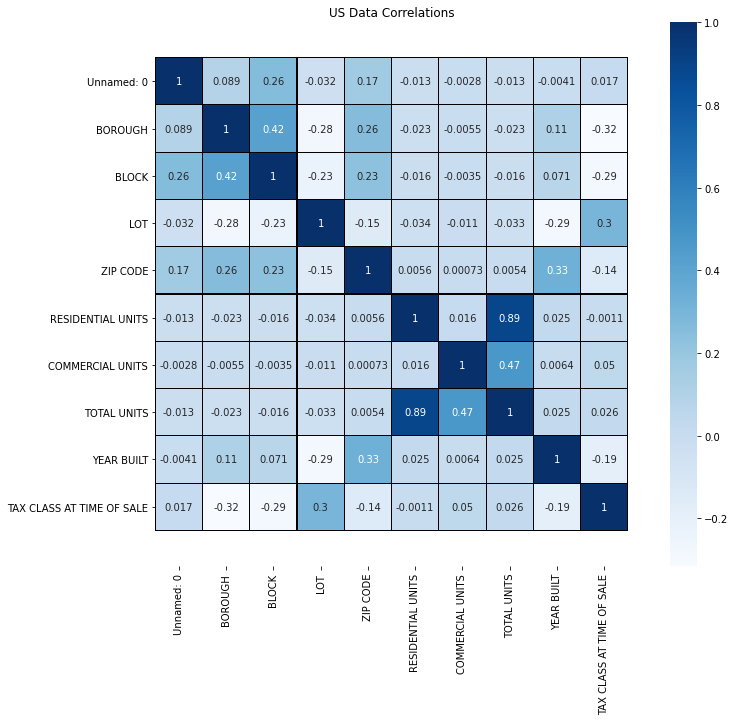

In [0]:
f, ax = plt.subplots(figsize=(15,10))
plt.title('US Data Correlations')

# Draw the headmap using seaborn
sns.heatmap(livebirths.corr(),linewidths=0.15, vmax=1.0, square=True, cmap="Blues", linecolor="black", annot=True)
# Discover the values for bottom and top
b, t = plt.ylim() 
# Add 0.5 to the bottom
b += 0.75 
# Substract 0.5 from top
t -= 0.75 
# Update the ylim(bottom, top ) values
plt.ylim(b,t)
  # taDa!
plt.show() 

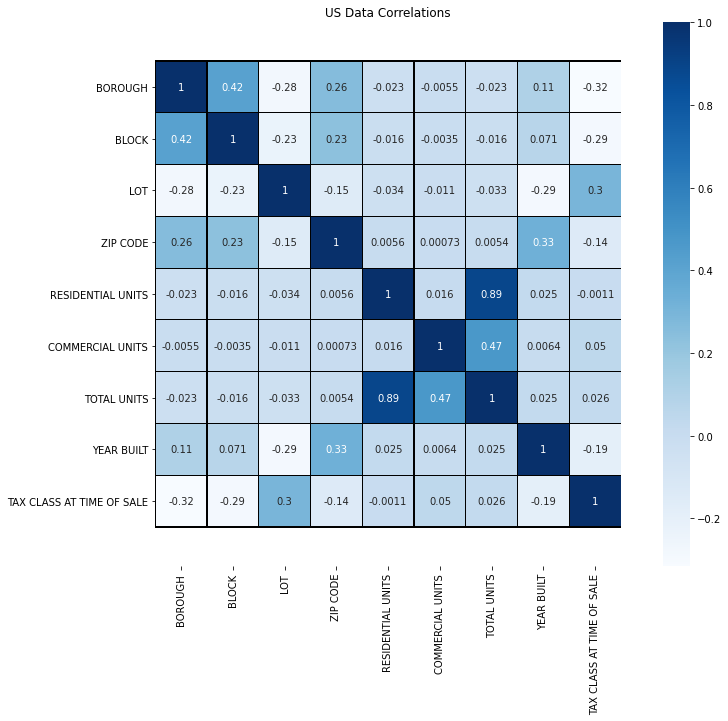

In [0]:
# This is the code to remove a column
# We rename the cell so the new cell can be within the new dataframe
livebirths3=livebirths.drop(['Unnamed: 0'], axis=1)

f, ax = plt.subplots(figsize=(15,10))
plt.title('US Data Correlations')

# Draw the heatmap using seaborn
sns.heatmap(livebirths3.corr(),linewidths=0.15, vmax=1.0, square=True, cmap="Blues", linecolor="black", annot=True)
b, t = plt.ylim() 
b += 0.75 
t -= 0.75 
plt.ylim(b,t)
plt.show()